In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import h5py
import imageio
import matplotlib
import gc
import sys
import io

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(rf'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

tidy3dAPI = os.environ["API_TIDY3D_KEY"]
plt.rc('font', family='Arial')

In [2]:
output_file = rf"F:\2D SHU Chi Statistics\data\10_04_2024 Beam Spreading Tight Bandwidth Periodic Conditions L=12\intensities_exit_average.h5"

def print_h5_keys(h5_group, indent=0):
    for key in h5_group.keys():
        print(' ' * indent + key)
        # If the key is a group, recurse into it
        if isinstance(h5_group[key], h5py.Group):
            print_h5_keys(h5_group[key], indent + 4)

# Open the HDF5 file in read mode and print all keys
with h5py.File(output_file, 'r') as h5f:
    print_h5_keys(h5f)

References
    L=12 nu=0.14 - 0.18
    L=12 nu=0.18 - 0.2
    L=12 nu=0.26 - 28
    L=12 nu=0.28 - 31
chi_0.30_N_10000_posics
    chi_0.30_N_10000_posics_L=12 nu=0.14 - 0.18
    chi_0.30_N_10000_posics_L=12 nu=0.18 - 0.2
    chi_0.30_N_10000_posics_L=12 nu=0.26 - 0.28
    chi_0.30_N_10000_posics_L=12 nu=0.28 - 0.31
chi_0.31_N_10000_posics
    chi_0.31_N_10000_posics_L=12 nu=0.14 - 0.18
    chi_0.31_N_10000_posics_L=12 nu=0.18 - 0.2
    chi_0.31_N_10000_posics_L=12 nu=0.26 - 0.28
    chi_0.31_N_10000_posics_L=12 nu=0.28 - 0.31
chi_0.32_N_10000_posics
    chi_0.32_N_10000_posics_L=12 nu=0.14 - 0.18
    chi_0.32_N_10000_posics_L=12 nu=0.18 - 0.2
    chi_0.32_N_10000_posics_L=12 nu=0.26 - 0.28
    chi_0.32_N_10000_posics_L=12 nu=0.28 - 0.31
chi_0.33_N_10000_posics
    chi_0.33_N_10000_posics_L=12 nu=0.14 - 0.18
    chi_0.33_N_10000_posics_L=12 nu=0.18 - 0.2
    chi_0.33_N_10000_posics_L=12 nu=0.26 - 0.28
    chi_0.33_N_10000_posics_L=12 nu=0.28 - 0.31
chi_0.34_N_10000_posics
    chi_0.34_N

In [3]:
data = []
with h5py.File(output_file, 'r') as h5f:
    # Iterate through each group (corresponding to the outer folders)

    for group_name in h5f:
        group = h5f[group_name]
        # Iterate through each dataset (corresponding to the frequencies)
        data_item = []
        for dataset_name in group:
            # Read the data from the dataset
            intensity_data = group[dataset_name][:]
            data_item.append({"set":dataset_name,"Intensity Data": intensity_data})
        data.append({"chi":group_name,"data":data_item})


In [4]:
import scipy.integrate
def calculate_IPR(intensity_array,x1):
    values = intensity_array
    integral_1 = scipy.integrate.simpson(values**2, x=x1, axis=0)
    integral_2 = scipy.integrate.simpson(values, x=x1,axis=0)**2

    return integral_1/integral_2

def moving_average(x, w=3):
    return np.convolve(x, np.ones(w), 'valid') / w

C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\2061065529.py:7: RuntimeWarning: invalid value encountered in divide
  return integral_1/integral_2
C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\2449918019.py:17: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(time[9:],moving_average(0.5/ipr,10), label=freq["set"])


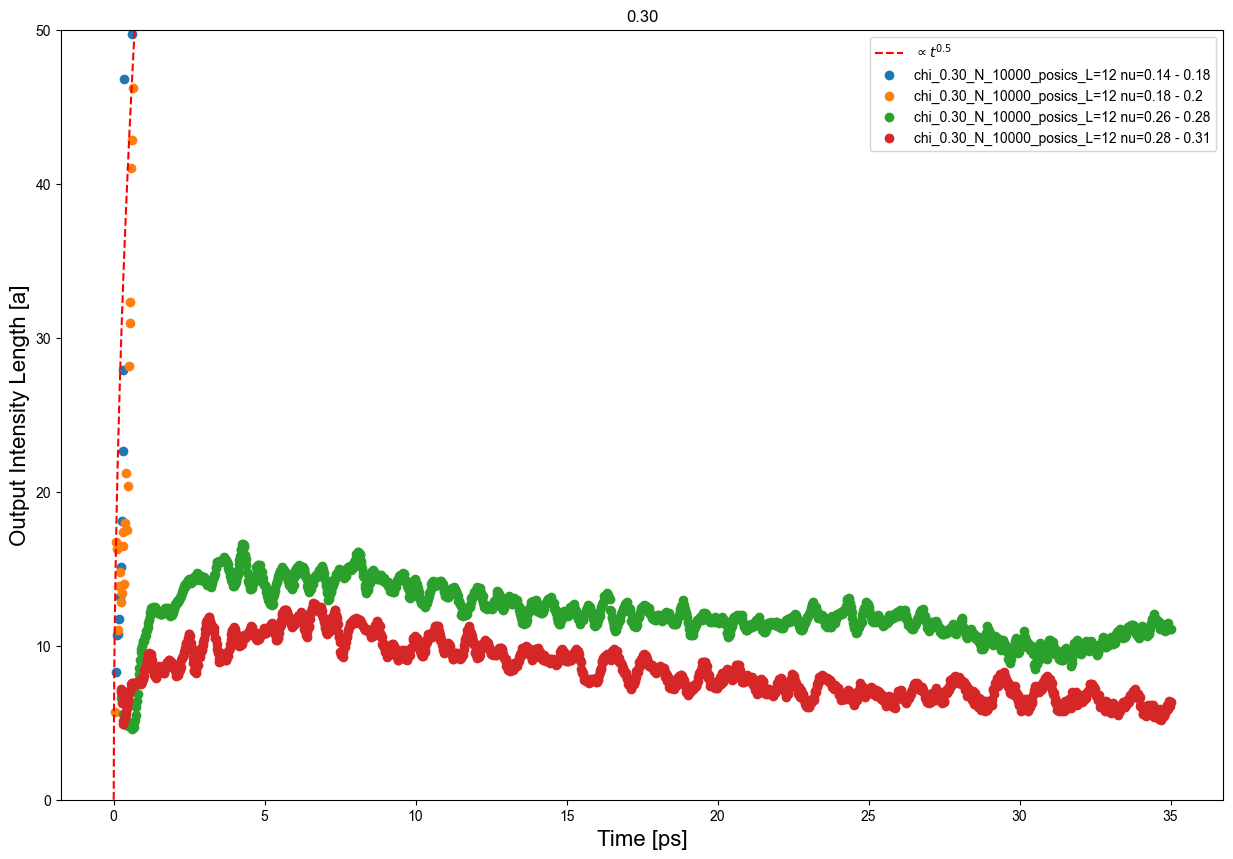

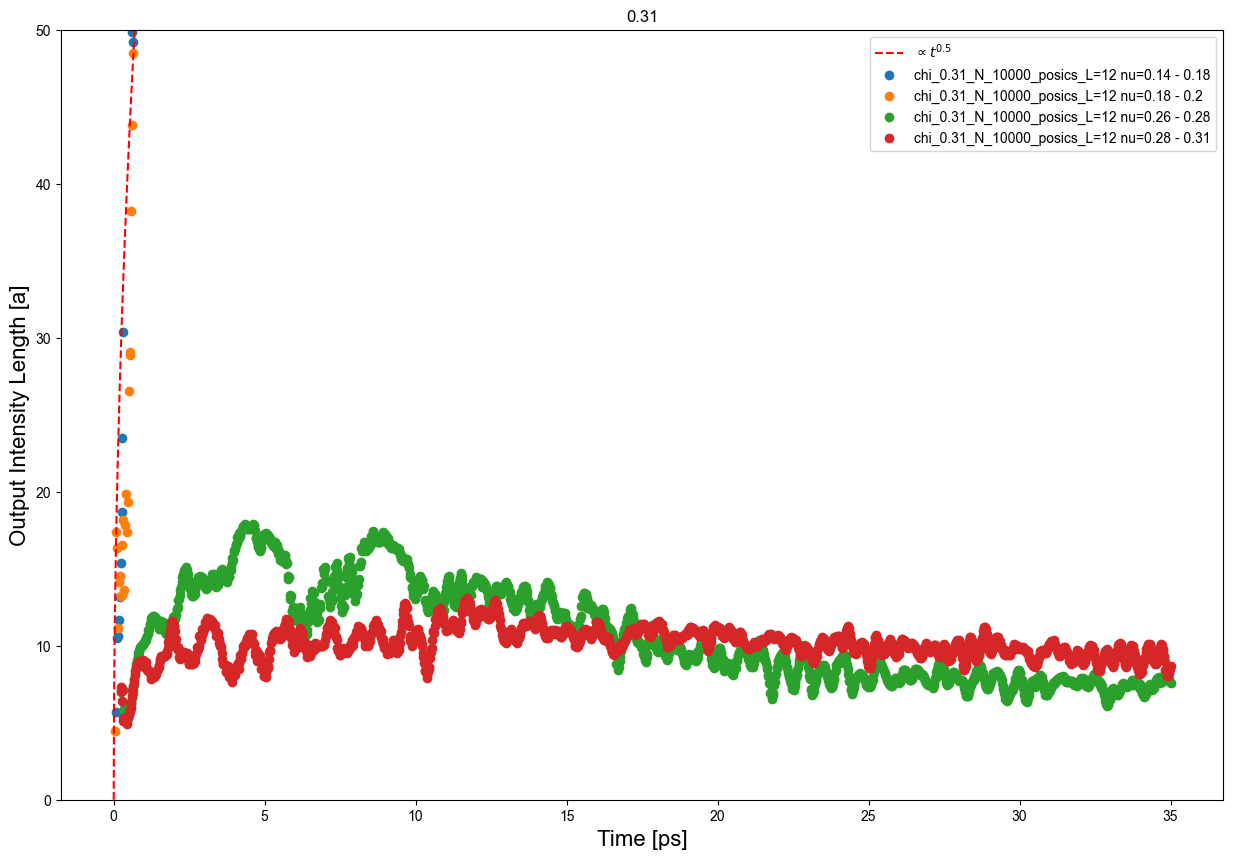

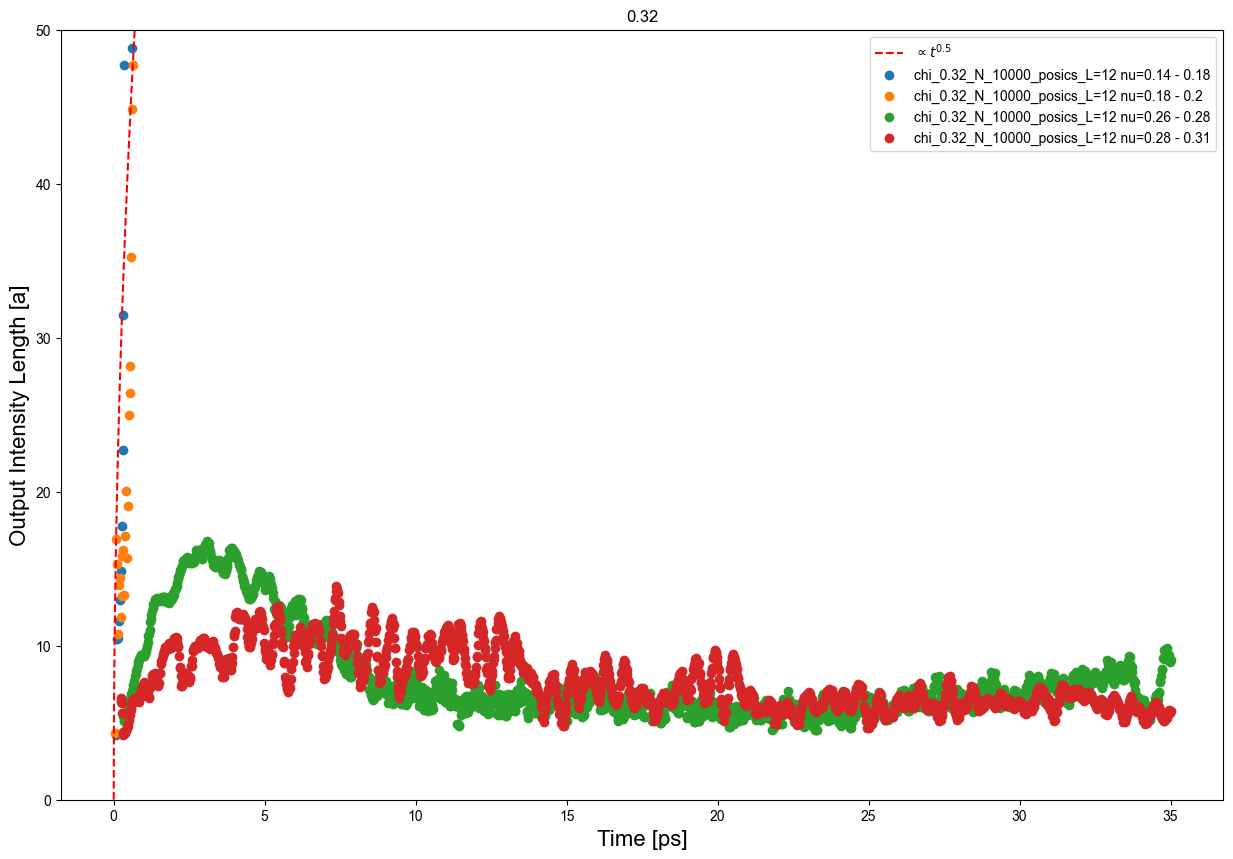

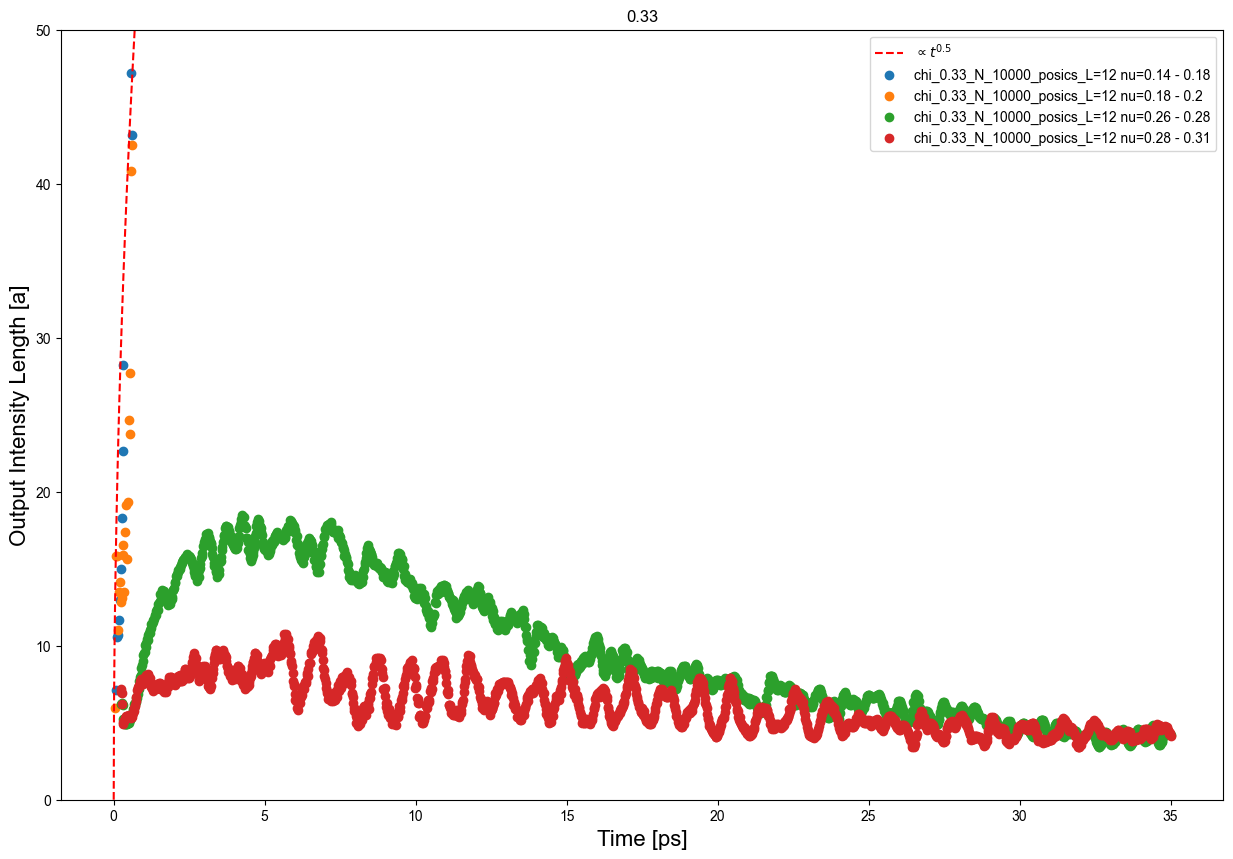

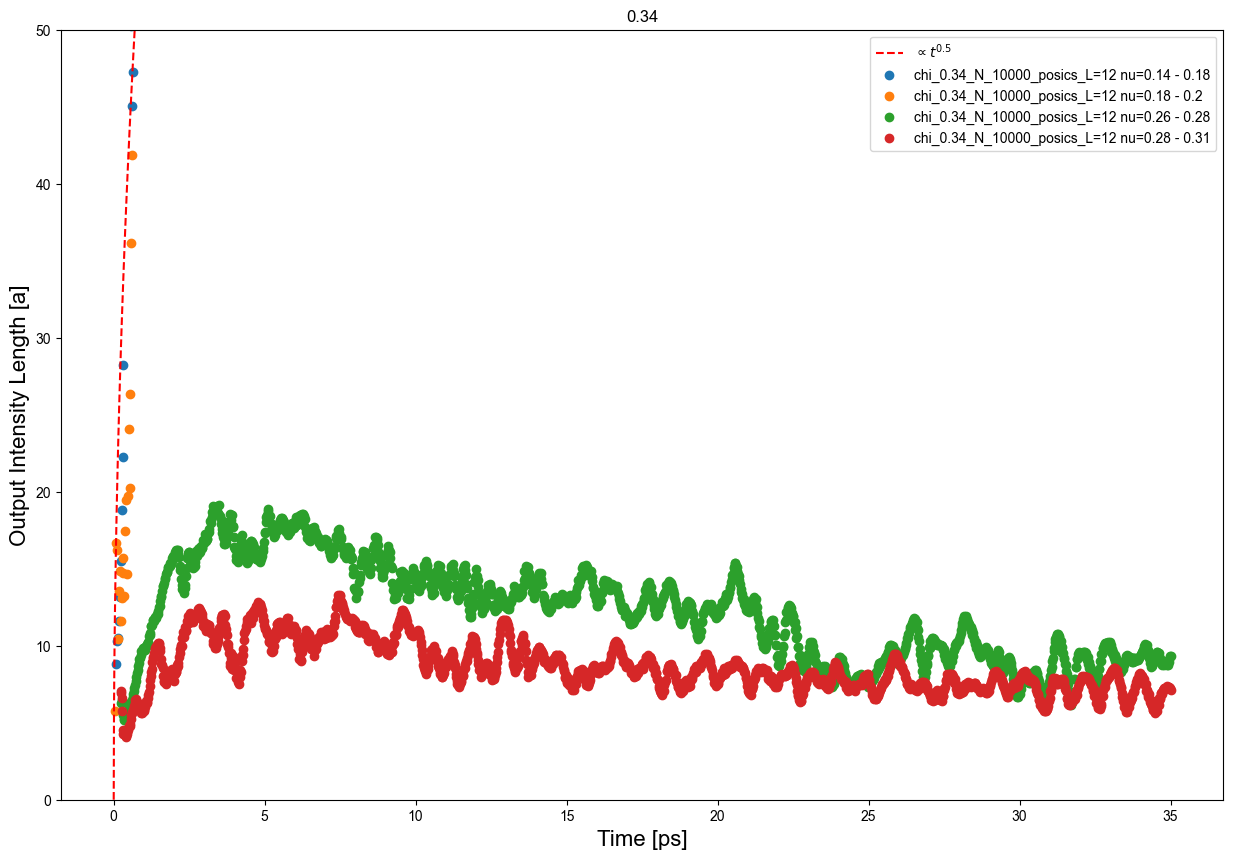

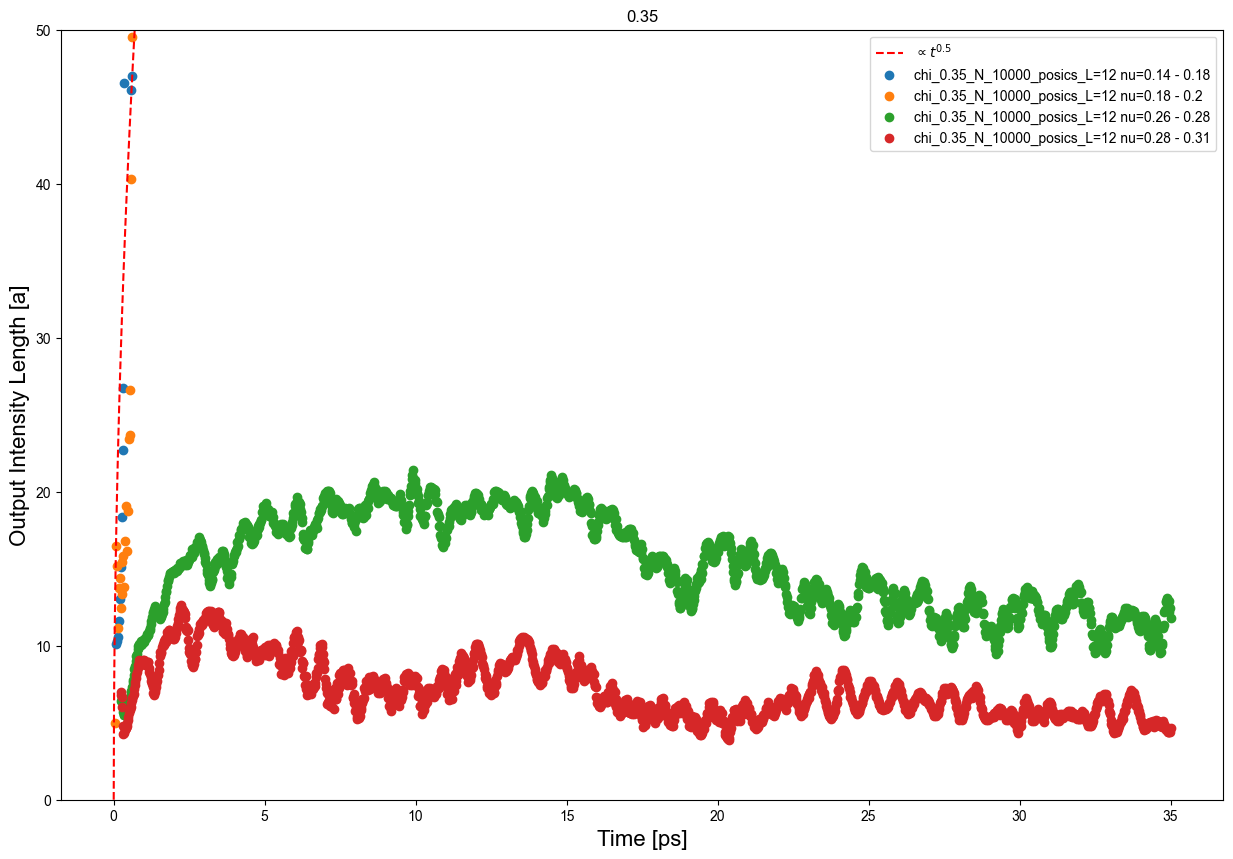

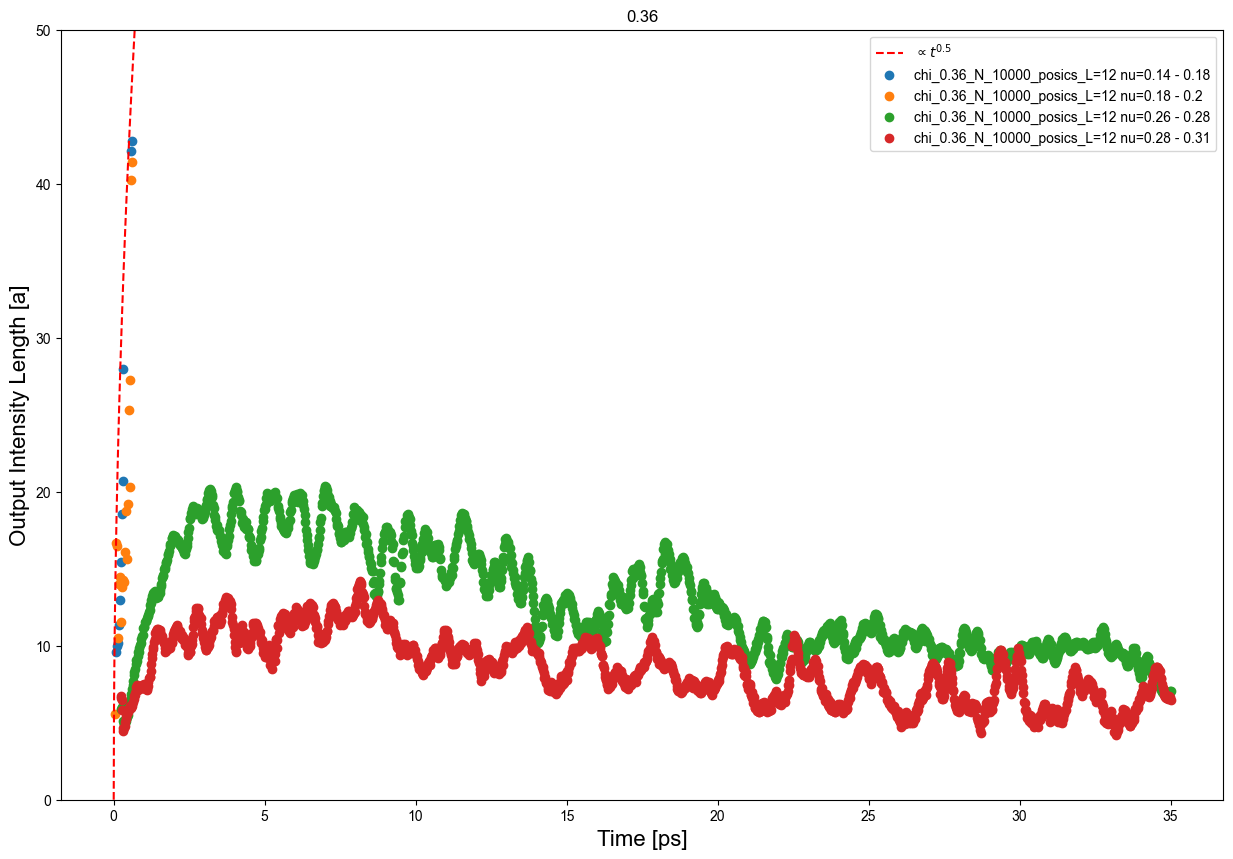

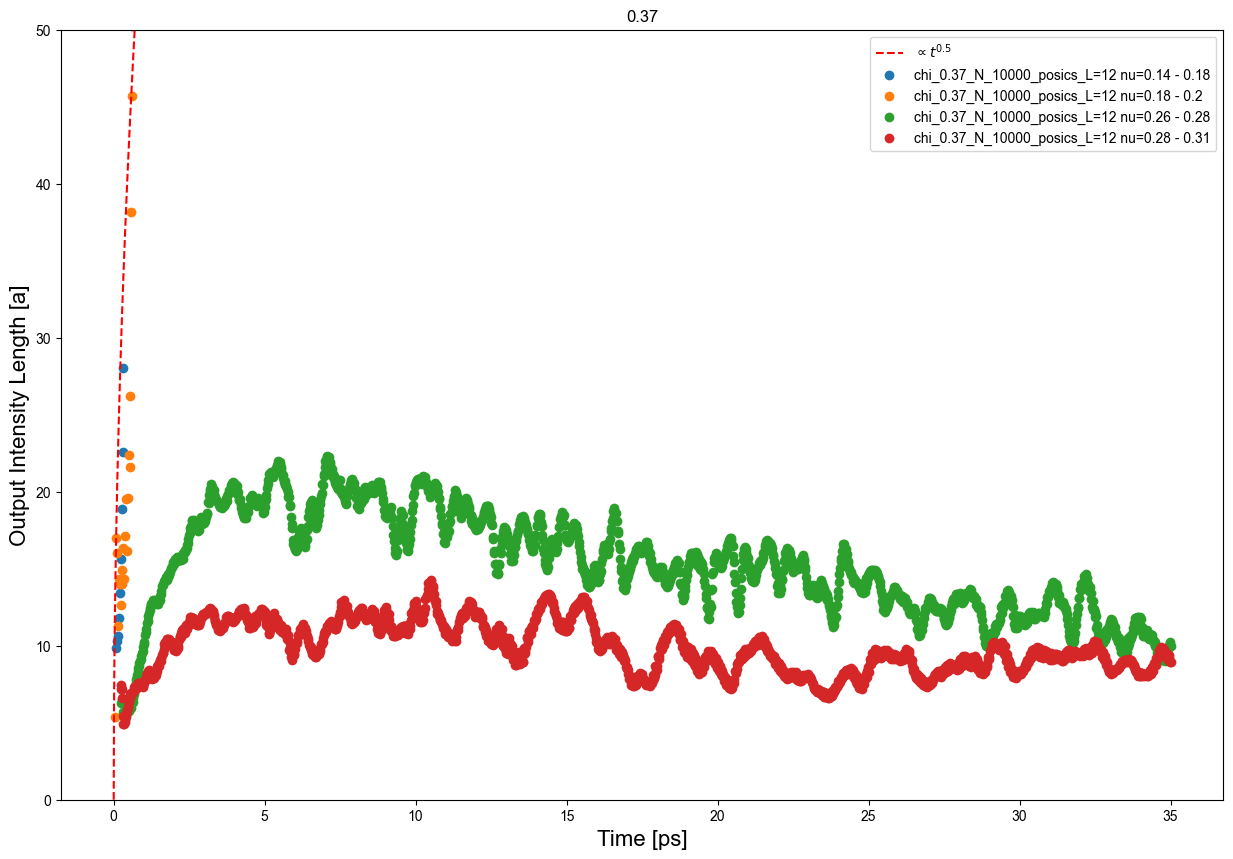

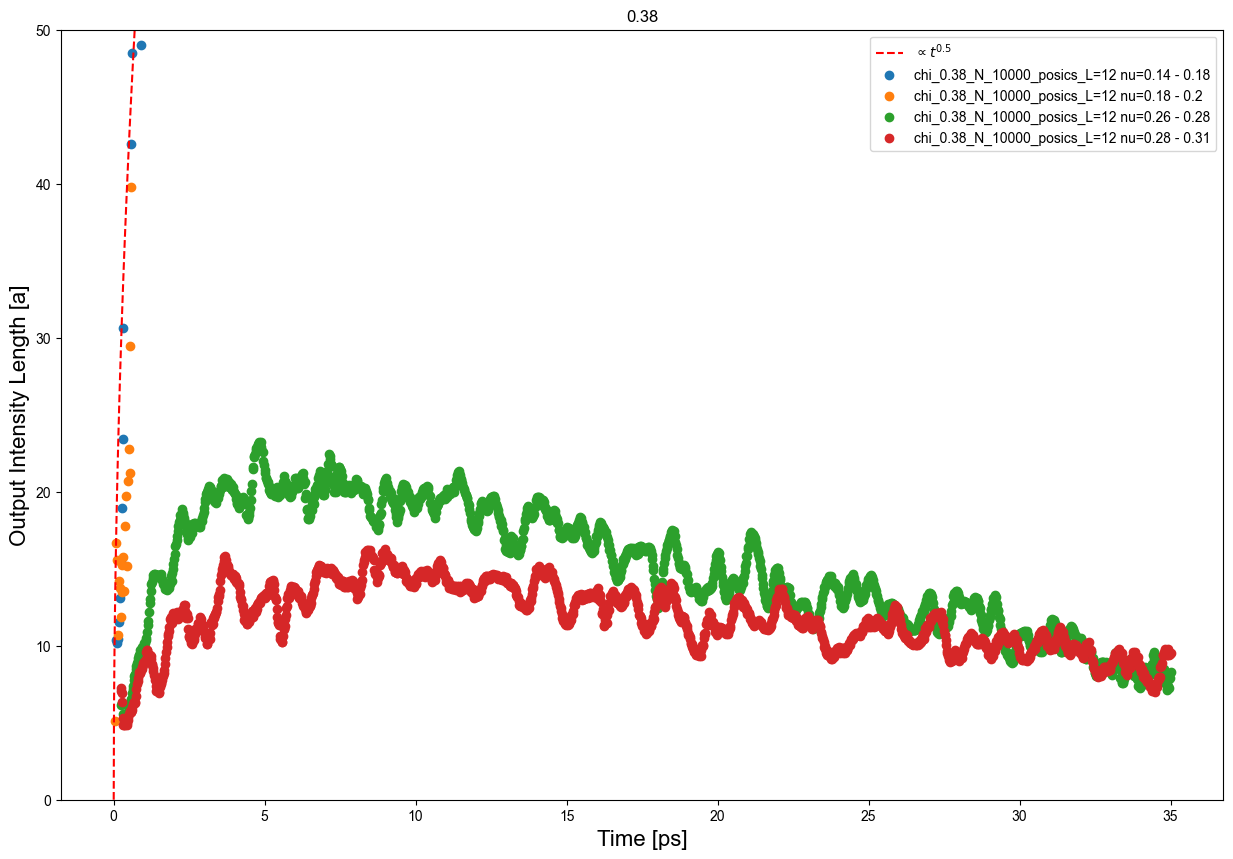

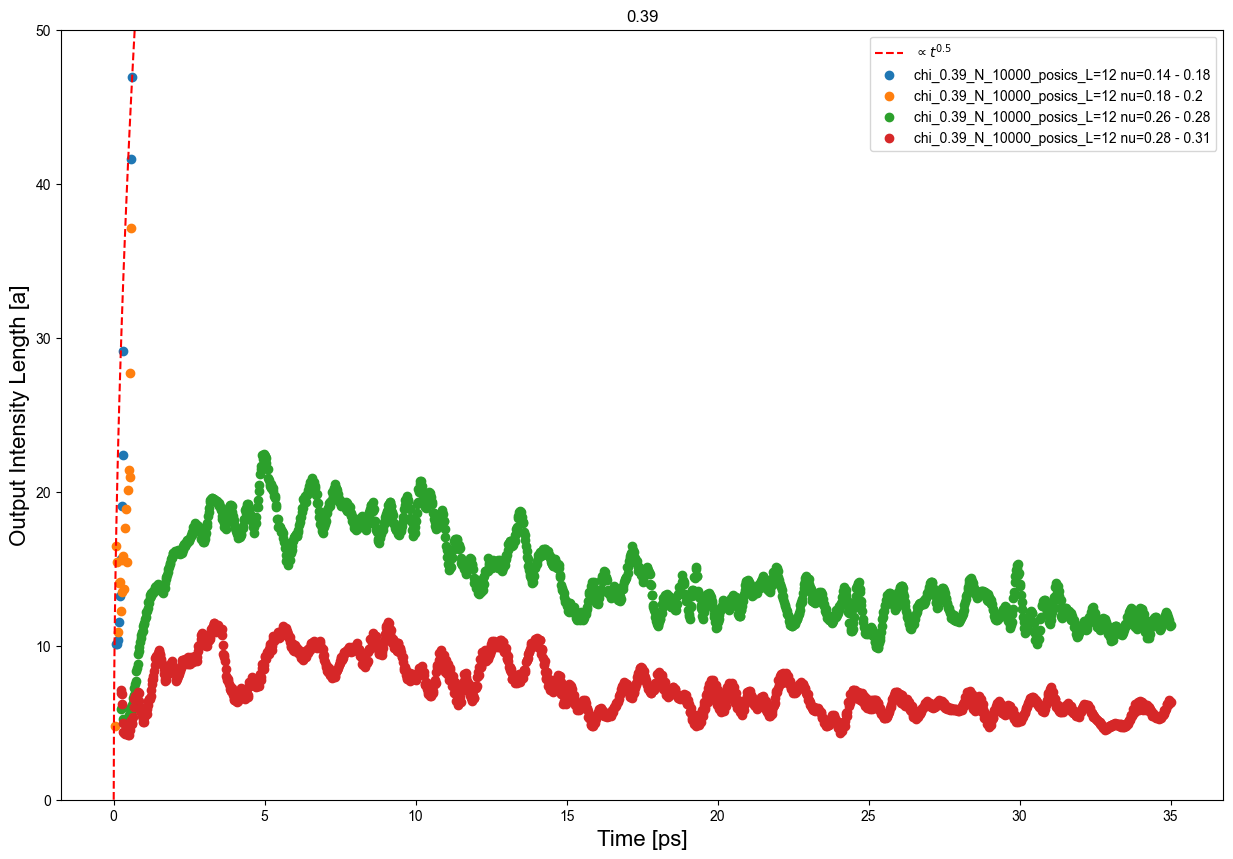

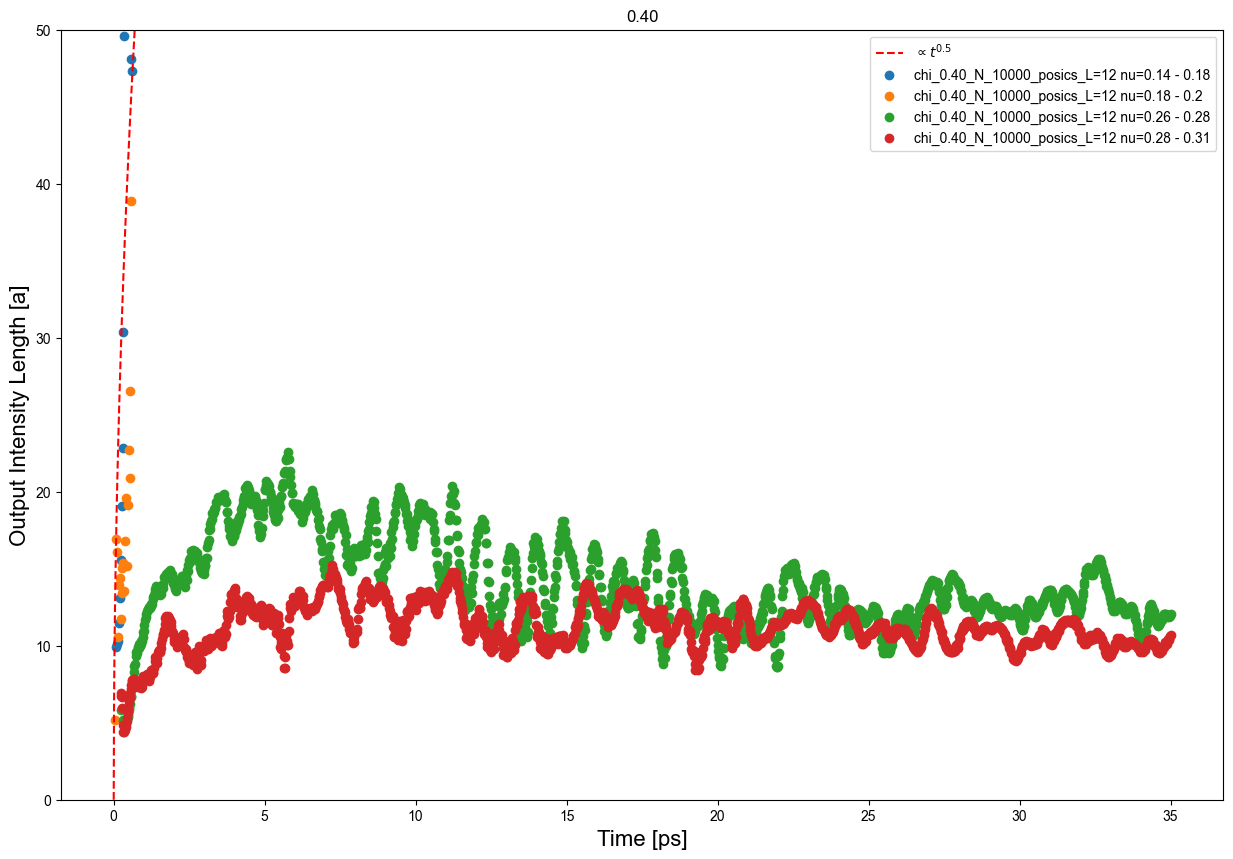

In [5]:
from scipy.optimize import curve_fit
def test(t, b,c):
    return b * t**c
chi_values = ["Reference", "0.30","0.31","0.32","0.33","0.34","0.35","0.36","0.37","0.38","0.39","0.40"]
for i, chi in enumerate(data):
 if i ==0:
    continue
 plt.figure(figsize=(15, 10))
 plt.plot(np.linspace(0,1,100),60*np.sqrt(np.linspace(0,1,100)),"--",color="red", label=r"$\propto t^{0.5}$")
 for j, freq in enumerate(chi["data"]):
    time = np.linspace(0,35,np.shape(freq["Intensity Data"])[-1])
    x_values = np.linspace(-49.5,49.5,np.shape(freq["Intensity Data"])[0])
    ipr = calculate_IPR(freq["Intensity Data"],x1=x_values)
    if j<2:
      plt.scatter(time[:500],1/ipr[:500], label=freq["set"])
    else: 
       plt.scatter(time[9:],moving_average(0.5/ipr,10), label=freq["set"])
 plt.legend()
 plt.ylim(0,50)
 plt.title(chi_values[i])
 plt.ylabel(rf"Output Intensity Length [a]",fontdict={"fontsize":16})
 plt.xlabel(rf"Time [ps]",fontdict={"fontsize":16})
 plt.show()
    



In [29]:
import matplotlib.colors as mcolors
# Create a custom colormap
colors = [
              (1, 1, 1),  # White
              (0, 0, 1),  # Blue
              (1, 1, 0),  # Yellow
              (0, 1, 0),  # Green
              (1, 0, 0), #Red
              (0, 0, 0), # Black
              ]  
n_bins = 500  # Number of bins for smooth transition
cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=n_bins)
freq_values = [rf"$\nu =$0.14 - 0.18", rf"$\nu =$0.18 - 0.2", rf"$\nu =$0.26 - 0.28", rf"$\nu =$0.28 - 0.32"]

for i, chi in enumerate(data):
    if i  in [0]:
        continue
    fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(24,10))
    for j, freq in enumerate(chi["data"]):
        time = np.linspace(0,35,np.shape(freq["Intensity Data"])[-1])
        x_values = np.linspace(-49.5,49.5,np.shape(freq["Intensity Data"])[0])
        intensity_values  = freq["Intensity Data"]
        intensity_values[intensity_values/np.max(intensity_values)<=1e-10] = 0
        normalized_intensity = intensity_values/np.max(intensity_values,axis=(0))
        normalized_intensity[np.isnan(normalized_intensity)] = 0

        ipr = calculate_IPR(freq["Intensity Data"],x1=x_values)
        if i ==0:
             ax[0,0].scatter(time,1/ipr, label=freq_values[j])
        else:
            if j<2:
              ax[0, 0].scatter(time[:55],1/ipr[:55], label=freq_values[j],s=4.5)
            else: 
               ax[0,0].scatter(time[9:],moving_average(1/ipr,10), label=freq_values[j],s=4.5)
            #    ax[0,0].scatter(time[:],(0.5/ipr), label=freq_values[j],s=4.5)

        if i>0 and j<2:
            if j==0:
                values_index = np.where(time<=0.4)[0]
            if j==1:
                values_index = np.where(time<=0.8)[0]
        elif i==0:
             values_index = np.where(time<=0.4)[0]
        else: 
            values_index = np.where(time<=35)[0]
        
        if j>0:
            im = ax[j//2, j%2].imshow(normalized_intensity[:,values_index], vmin = np.min(normalized_intensity[:,values_index]), vmax = np.max(normalized_intensity[:,values_index]), 
                     extent =[np.min(time[values_index]),np.max(time[values_index]),np.min(x_values),np.max(x_values)], 
                         origin ='lower', cmap=cmap,aspect='auto', interpolation="gaussian") 
           
            ax[j//2, j%2].set_title(freq_values[j],fontsize=18)
            ax[j//2, j%2].set_ylabel(rf"Lateral Expansion at Output (a)",fontsize=18)
            ax[j//2, j%2].set_xlabel(rf"$Time (ps)$",fontsize=18)
            ax[j//2, j%2].tick_params(which='major', labelsize=16)
    
    ax[0,0].plot(np.linspace(0,1,100),45*np.sqrt(np.linspace(0.02,4,100)),"--",color="red", label=r"$\propto t^{0.5}$")
    ax[0,0].set_ylim(0,90)
    ax[0,0].legend(fontsize=18)
    ax[0,0].set_ylabel(rf"Output Intensity Length (a)",fontsize=18)
    ax[0,0].set_xlabel(rf"$Time (ps)$",fontsize=18)
    ax[0,0].tick_params(which='major', labelsize=16)
    cbar = fig.colorbar(im, ax=ax, pad=0.05)
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label(rf"$|E|^2$ Normalized", fontsize=18)
    cbar.ax.yaxis.set_label_position('left')
    fig.suptitle(rf"$\chi=${chi_values[i]}", fontsize=20, x=0.4)
    fig.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the rect parameter to leave space for the colorbar
    plt.subplots_adjust(hspace=0.4)  # Increase space between rows (hspace) and columns (wspace)
    plt.savefig(rf"F:\2D SHU Chi Statistics\data\10_04_2024 Beam Spreading Tight Bandwidth Periodic Conditions L=12\Figures\Distributions Exit Time\chi={chi_values[i]}.pdf")
    plt.close(fig)
    # plt.show()




C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\3383012591.py:24: RuntimeWarning: invalid value encountered in divide
  normalized_intensity = intensity_values/np.max(intensity_values,axis=(0))
C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\2061065529.py:7: RuntimeWarning: invalid value encountered in divide
  return integral_1/integral_2
C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\3383012591.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.75, 1])  # Adjust the rect parameter to leave space for the colorbar
C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\3383012591.py:24: RuntimeWarning: invalid value encountered in divide
  normalized_intensity = intensity_values/np.max(intensity_values,axis=(0))
C:\Users\HernandF\AppData\Local\Temp\ipykernel_33340\2061065529.py:7: RuntimeWarning: invalid value encountered in divide
  return integral_1/integral_2
C:\Users\H